In [1]:
import pandas as pd
import numpy as np

In [2]:
# For easy display of floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
import warnings
warnings.filterwarnings('ignore')

### First Step before we build a model is Data Preparation. This will involve a) Data Exploration , visualization, and Understanding the data ( Categorical vs. Numeric  etc.) b) Cleaning the data and dealing with outliers and missing values and c) Scaling the data - if required
### Scaling helps in model convergence and avoiding bias (one feature more important than other due to scale). I am planning to use Classification models (Logistic regression, Decision Tree and random Forest) - which does not require scaling 
### We should as well find correlation  among predictors - if predictors are highly correlated - we may think of reducing / combining feature space

# Data Preparation

In [4]:
dfData = pd.read_csv("trainingdata.csv",header=0)
print(dfData.shape)
dfData.head()

(150000, 12)


,Unnamed: 0,delinquency,UtilisationRatio,age,28-59DaysPastDue,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,91DaysLate,NumberRealEstateLoansOrLines,60-90DaysPastDue,NumberOfDependents
0,1,1,0.766,45,2,0.803,9120.000,13,0,6,0,2.000
1,2,0,0.957,40,0,0.122,2600.000,4,0,0,0,1.000
2,3,0,0.658,38,1,0.085,3042.000,2,1,0,0,0.000
3,4,0,0.234,30,0,0.036,3300.000,5,0,0,0,0.000
4,5,0,0.907,49,1,0.025,63588.000,7,0,1,0,0.000


In [5]:
# Drop first UnNamed Counter Column
dfData.drop(columns=['Unnamed: 0'],inplace=True)
print(dfData.shape)
dfData.head()

(150000, 11)


,delinquency,UtilisationRatio,age,28-59DaysPastDue,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,91DaysLate,NumberRealEstateLoansOrLines,60-90DaysPastDue,NumberOfDependents
0,1,0.766,45,2,0.803,9120.000,13,0,6,0,2.000
1,0,0.957,40,0,0.122,2600.000,4,0,0,0,1.000
2,0,0.658,38,1,0.085,3042.000,2,1,0,0,0.000
3,0,0.234,30,0,0.036,3300.000,5,0,0,0,0.000
4,0,0.907,49,1,0.025,63588.000,7,0,1,0,0.000


In [6]:
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
delinquency                        150000 non-null int64
UtilisationRatio                   150000 non-null float64
age                                150000 non-null int64
28-59DaysPastDue                   150000 non-null int64
DebtRatio                          150000 non-null float64
MonthlyIncome                      120269 non-null float64
NumberOfOpenCreditLinesAndLoans    150000 non-null int64
91DaysLate                         150000 non-null int64
NumberRealEstateLoansOrLines       150000 non-null int64
60-90DaysPastDue                   150000 non-null int64
NumberOfDependents                 146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [7]:
dfData.describe()

,delinquency,UtilisationRatio,age,28-59DaysPastDue,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,91DaysLate,NumberRealEstateLoansOrLines,60-90DaysPastDue,NumberOfDependents
count,150000.000,150000.000,150000.000,150000.000,150000.000,120269.000,150000.000,150000.000,150000.000,150000.000,146076.000
mean,0.067,6.048,52.295,0.421,353.005,6670.221,8.453,0.266,1.018,0.240,0.757
std,0.250,249.755,14.772,4.193,2037.819,14384.674,5.146,4.169,1.130,4.155,1.115
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.030,41.000,0.000,0.175,3400.000,5.000,0.000,0.000,0.000,0.000
50%,0.000,0.154,52.000,0.000,0.367,5400.000,8.000,0.000,1.000,0.000,0.000
75%,0.000,0.559,63.000,0.000,0.868,8249.000,11.000,0.000,2.000,0.000,1.000
max,1.000,50708.000,109.000,98.000,329664.000,3008750.000,58.000,98.000,54.000,98.000,20.000


In [8]:
dfData['NumberOfDependents'] = dfData['NumberOfDependents'].fillna(dfData['NumberOfDependents'].median())
dfData['MonthlyIncome'] = dfData['MonthlyIncome'].fillna(dfData['MonthlyIncome'].median())
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
delinquency                        150000 non-null int64
UtilisationRatio                   150000 non-null float64
age                                150000 non-null int64
28-59DaysPastDue                   150000 non-null int64
DebtRatio                          150000 non-null float64
MonthlyIncome                      150000 non-null float64
NumberOfOpenCreditLinesAndLoans    150000 non-null int64
91DaysLate                         150000 non-null int64
NumberRealEstateLoansOrLines       150000 non-null int64
60-90DaysPastDue                   150000 non-null int64
NumberOfDependents                 150000 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


#### Data Visualization

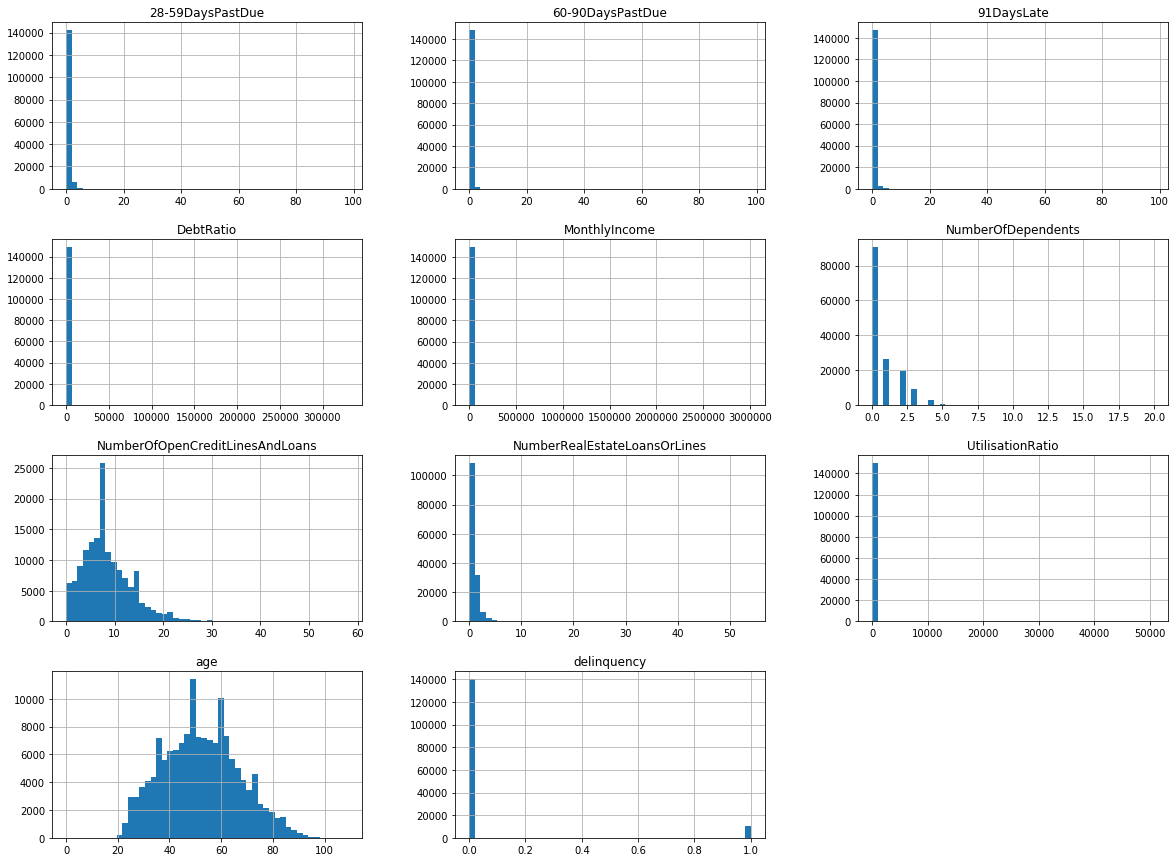

In [9]:
# Observing if there is any Outlier
%matplotlib inline  
import matplotlib.pyplot as plt
dfData.hist(bins=50, figsize=(20,15))
plt.show()

#### Data Correlation

In [10]:
corr_matrix = dfData.corr()
corr_matrix['MonthlyIncome'].sort_values(ascending=False)

MonthlyIncome                      1.000
NumberRealEstateLoansOrLines       0.116
NumberOfOpenCreditLinesAndLoans    0.087
NumberOfDependents                 0.066
age                                0.028
UtilisationRatio                   0.007
28-59DaysPastDue                  -0.008
60-90DaysPastDue                  -0.009
91DaysLate                        -0.011
delinquency                       -0.017
DebtRatio                         -0.018
Name: MonthlyIncome, dtype: float64

In [11]:
corr_matrix['delinquency'].sort_values(ascending=False)

delinquency                        1.000
28-59DaysPastDue                   0.126
91DaysLate                         0.117
60-90DaysPastDue                   0.102
NumberOfDependents                 0.047
UtilisationRatio                  -0.002
NumberRealEstateLoansOrLines      -0.007
DebtRatio                         -0.008
MonthlyIncome                     -0.017
NumberOfOpenCreditLinesAndLoans   -0.030
age                               -0.115
Name: delinquency, dtype: float64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

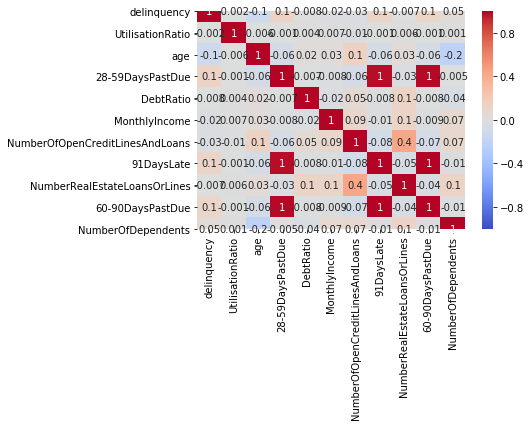

In [13]:
#sns.heatmap(dfData.corr(), annot = True,square=True)
sns.heatmap(dfData.corr(), annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

# Select and Train a Model

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dfData, test_size=0.2, random_state=42)
train_set.reset_index(drop=True,inplace=True)
test_set.reset_index(drop=True,inplace=True)
train_set.head()

,delinquency,UtilisationRatio,age,28-59DaysPastDue,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,91DaysLate,NumberRealEstateLoansOrLines,60-90DaysPastDue,NumberOfDependents
0,0,0.000,29,0,0.012,4342.000,5,0,0,0,0.000
1,0,0.596,55,0,0.835,1833.000,11,0,1,0,0.000
2,0,0.000,43,0,0.043,4166.000,2,0,0,0,4.000
3,0,0.392,40,0,0.060,9000.000,2,0,0,0,5.000
4,0,0.000,35,0,0.134,5800.000,12,0,1,0,0.000


In [15]:
targetCol = ['delinquency']
colList = dfData.columns
predictors = [x for x in colList if x not in targetCol ]
print(targetCol)
print(predictors)


['delinquency']
['UtilisationRatio', 'age', '28-59DaysPastDue', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', '91DaysLate', 'NumberRealEstateLoansOrLines', '60-90DaysPastDue', 'NumberOfDependents']


In [16]:
X_train,X_test,Y_train,Y_test = train_set[predictors],test_set[predictors],train_set[targetCol],test_set[targetCol]
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120000, 10) (30000, 10) (120000, 1) (30000, 1)


In [18]:
""" This method will perform cross validation and will return result based on parameters passed. One can set scoring to get accuracy score or method as predict probablities to get distribution"""

from sklearn.model_selection import cross_val_predict,cross_val_score
def getCrossValPredict(classifier,X_train,Y_train,cv=10, scoring=None, method=None):
    TY = Y_train.to_numpy()
    if scoring is not None:
        crossValScore = cross_val_score(classifier, X_train, TY.ravel(), cv=cv, scoring=scoring)
        return crossValScore
    if method is not None:
        y_train_pred = cross_val_predict(classifier, X_train,  TY.ravel(), cv=cv, method=method)
        return y_train_pred
    elif method is None or scoring is None:
        y_train_pred = cross_val_predict(classifier, X_train,  TY.ravel(), cv=cv)
        return y_train_pred
        
    

In [19]:
""" This method will get Confusion metrics - which will be used to determine precison / recall / F1Score"""
from sklearn.metrics import confusion_matrix
def getConfusionMatrix(Y_train,y_train_pred):
    TY = Y_train.to_numpy()
    conf = confusion_matrix(TY.ravel(), y_train_pred)
    return conf
    

In [20]:
"""get precision / recall / F1-Score """
from sklearn.metrics import precision_score, recall_score,f1_score
def getClassificationMetrics(Y_train,y_train_pred):
    TY = Y_train.to_numpy()
    precision = precision_score(TY.ravel(), y_train_pred) 

    recall = recall_score(TY.ravel(), y_train_pred) 
    f1Score =f1_score(TY.ravel(), y_train_pred)
    return precision, recall, f1Score

    

In [21]:
"""This method will get precison recall curve - to observe tradeoff"""
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_vs_threshold(Y_train,y_train_pred):
    precisions, recalls, thresholds = precision_recall_curve(Y_train, y_train_pred)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

In [22]:
"""This method will plot ROC Cuve - to determie randomness / quality of prediction"""
from sklearn.metrics import roc_curve
def plot_roc_curve(Y_train, y_train_pred, label=None):
    fpr, tpr, thresholds = roc_curve(Y_train, y_train_pred)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [23]:
"""This method will plot ROC Cuve - to determie randomness / quality of prediction"""
from sklearn.metrics import roc_curve
def plot_roc_curve_with_fpr(fpr, tpr, label=None):
    
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [24]:
"""This method will get ROC score. Higher the score - it is better"""
from sklearn.metrics import roc_auc_score
def getROCScore(Y_train,y_train_pred):
    score = roc_auc_score(Y_train, y_train_pred)
    return score
    

# SGD (Stochastic Gradient Descent) model

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
accuracyScore = getCrossValPredict(sgd_clf,X_train,Y_train,cv=10, scoring="accuracy")
print(accuracyScore)

[0.9315     0.93275    0.93241667 0.93258333 0.93258333 0.92875
 0.93158333 0.93275    0.93175    0.9325    ]


In [27]:
# For getting Precsion, recall and ROC Curve, let us get prediction probablities
y_train_pred = getCrossValPredict(sgd_clf,X_train,Y_train,cv=10)
print(y_train_pred.shape)

(120000,)


In [28]:
# Get fpr , tpr score of SGD Classifier ()
from sklearn.metrics import roc_curve

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(Y_train, y_train_pred)

In [29]:
# Get The confusion metrics
conf_matrix = getConfusionMatrix(Y_train,y_train_pred)
print(conf_matrix)

[[111710    220]
 [  7950    120]]


In [30]:
# Get Precision , Recall and F1 Score
precison,recall,f1score = getClassificationMetrics(Y_train,y_train_pred)
print(precison,recall,f1score)

0.35294117647058826 0.01486988847583643 0.02853745541022592


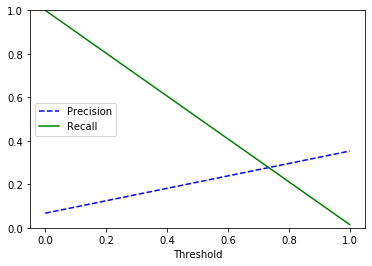

In [31]:
# Plot precision recall graph under probablistic distribution
plot_precision_recall_vs_threshold(Y_train,y_train_pred)

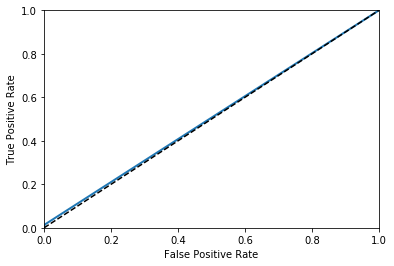

In [32]:
# Plot ROC Curve
plot_roc_curve(Y_train, y_train_pred)

In [33]:
# Get Roc Score
rocScore = getROCScore(Y_train,y_train_pred)
print(rocScore)

0.5064521871576002


# Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train.to_numpy().ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# For getting Precsion, recall and ROC Curve, let us get prediction probablities
y_train_pred = getCrossValPredict(log_reg,X_train,Y_train,cv=10)
print(y_train_pred.shape)

(120000,)


In [36]:
# Get The confusion metrics
conf_matrix = getConfusionMatrix(Y_train,y_train_pred)
print(conf_matrix)

[[111714    216]
 [  7780    290]]


In [37]:
# Get Precision , Recall and F1 Score
precison,recall,f1score = getClassificationMetrics(Y_train,y_train_pred)
print(precison,recall,f1score)

0.5731225296442688 0.03593556381660471 0.06763059701492538


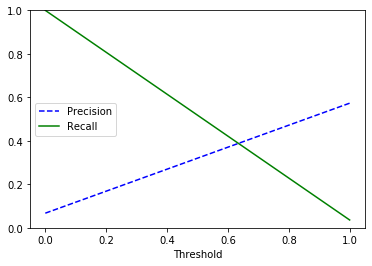

In [38]:
# Plot precision recall graph under probablistic distribution
plot_precision_recall_vs_threshold(Y_train,y_train_pred)

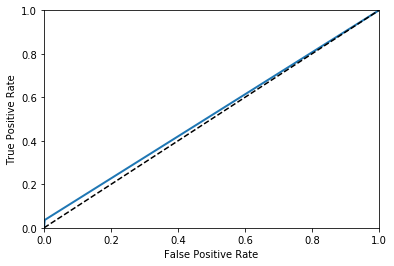

In [39]:
# Plot ROC Curve
plot_roc_curve(Y_train, y_train_pred)

In [40]:
# Get Roc Score
rocScore = getROCScore(Y_train,y_train_pred)
print(rocScore)

0.5170028931385355


# Desion Tree Classifier

In [41]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, Y_train.to_numpy().ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
# For getting Precsion, recall and ROC Curve, let us get prediction probablities
y_train_pred = getCrossValPredict(tree,X_train,Y_train,cv=10)
print(y_train_pred.shape)

(120000,)


In [43]:
# Get The confusion metrics
conf_matrix = getConfusionMatrix(Y_train,y_train_pred)
print(conf_matrix)

[[110894   1036]
 [  6670   1400]]


In [44]:
# Get Precision , Recall and F1 Score
precison,recall,f1score = getClassificationMetrics(Y_train,y_train_pred)
print(precison,recall,f1score)

0.5747126436781609 0.1734820322180917 0.26651437273938705


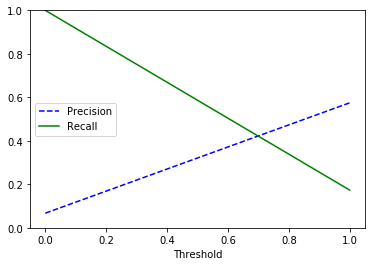

In [45]:
# Plot precision recall graph under probablistic distribution
plot_precision_recall_vs_threshold(Y_train,y_train_pred)

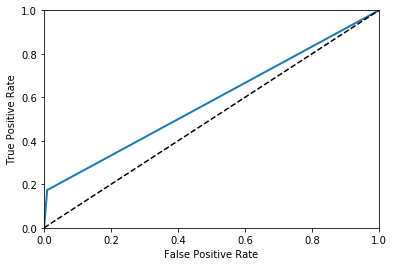

In [46]:
# Plot ROC Curve
plot_roc_curve(Y_train, y_train_pred)

In [47]:
# For getting Precsion, recall and ROC Curve, let us get prediction probablities
y_probas_tree = getCrossValPredict(tree,X_train,Y_train,cv=10,method="predict_proba")
print(y_probas_tree.shape)

(120000, 2)


In [48]:
y_scores_tree = y_probas_tree[:, 1]   # score = proba of positive class
fpr_tree, tpr_tree, thresholds_ = roc_curve(Y_train,y_scores_tree)

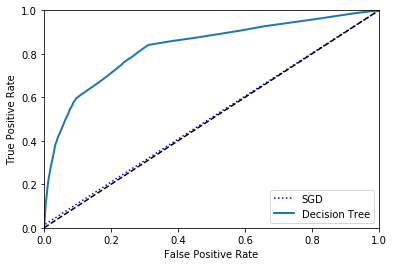

In [49]:
plt.plot(fpr_sgd, tpr_sgd, "b:", label="SGD")
plot_roc_curve_with_fpr(fpr_tree, tpr_tree, label = "Decision Tree")
plt.legend(loc="lower right")
plt.show()

In [50]:
# Get Roc Score
rocScore = getROCScore(Y_train,y_train_pred)
print(rocScore)

0.5821131236762753


# Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [52]:
# For getting Precsion, recall and ROC Curve, let us get prediction probablities
y_probas_forest = getCrossValPredict(forest_clf,X_train,Y_train,cv=10,method="predict_proba")
print(y_probas_forest.shape)

(120000, 2)


In [53]:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train,y_scores_forest)

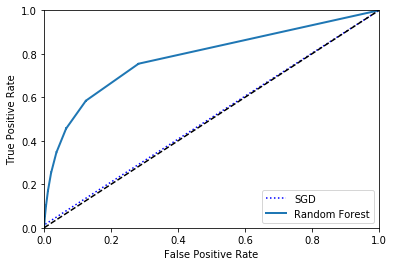

In [54]:
plt.plot(fpr_sgd, tpr_sgd, "b:", label="SGD")
plot_roc_curve_with_fpr(fpr_forest, tpr_forest, label = "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [55]:
# For getting Precsion, recall and ROC Curve, let us get prediction probablities
y_train_pred = getCrossValPredict(forest_clf,X_train,Y_train,cv=10)
print(y_train_pred.shape)

(120000,)


In [56]:
# Get The confusion metrics
conf_matrix = getConfusionMatrix(Y_train,y_train_pred)
print(conf_matrix)

[[110630   1300]
 [  6691   1379]]


In [57]:
# Get Precision , Recall and F1 Score
precison,recall,f1score = getClassificationMetrics(Y_train,y_train_pred)
print(precison,recall,f1score)

0.5147443075774543 0.1708798017348203 0.2565820076286166


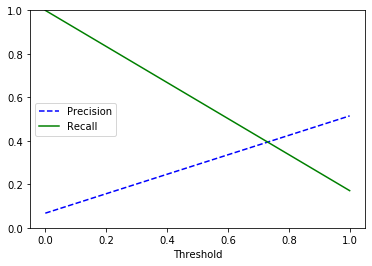

In [58]:
# Plot precision recall graph under probablistic distribution
plot_precision_recall_vs_threshold(Y_train,y_train_pred)

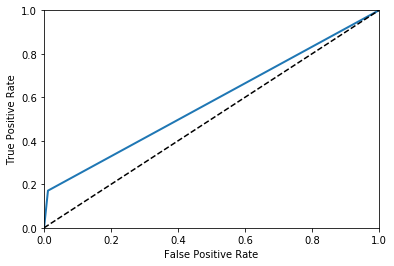

In [59]:
# Plot ROC Curve
plot_roc_curve(Y_train, y_train_pred)

In [60]:
# Get Roc Score
rocScore = getROCScore(Y_train,y_train_pred)
print(rocScore)

0.579632699938258


# Based on above 4 models - we will be using Random Forest model to solve Credit Scoring Problem

In [61]:
# We will find best model parameters for Random Forest through Grid Search

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4,8]},
  ]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_clf, param_grid, cv=10,
                           return_train_score=True)

grid_search.fit(X_train, Y_train.to_numpy().ravel())

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[

In [63]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_features': 2, 'n_estimators': 30}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [64]:
dfTest = pd.read_csv("testdata.csv",header=0)
dfTest.rename(columns={'Unnamed: 0':'RowNo'},inplace=True)
dfTestRowFrame = dfTest[['RowNo']]
dfTestData = dfTest[predictors]
dfTestTarget = dfTest[targetCol]
print(dfTestData.shape)
print(dfTestTarget.shape)
print(dfTestRowFrame.shape)
dfTestData.head()

(101503, 10)
(101503, 1)
(101503, 1)


,UtilisationRatio,age,28-59DaysPastDue,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,91DaysLate,NumberRealEstateLoansOrLines,60-90DaysPastDue,NumberOfDependents
0,0.886,43,0,0.178,5700.000,4,0,0,0,0.000
1,0.463,57,0,0.527,9141.000,15,0,4,0,2.000
2,0.043,59,0,0.688,5083.000,12,0,1,0,2.000
3,0.280,38,1,0.926,3200.000,7,0,2,0,0.000
4,1.000,27,0,0.020,3865.000,4,0,0,0,1.000


In [65]:
dfTestData['MonthlyIncome'] = dfTestData['MonthlyIncome'].fillna(dfTestData['MonthlyIncome'].median())
dfTestData['NumberOfDependents'] = dfTestData['NumberOfDependents'].fillna(dfTestData['NumberOfDependents'].median())

dfTestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
UtilisationRatio                   101503 non-null float64
age                                101503 non-null int64
28-59DaysPastDue                   101503 non-null int64
DebtRatio                          101503 non-null float64
MonthlyIncome                      101503 non-null float64
NumberOfOpenCreditLinesAndLoans    101503 non-null int64
91DaysLate                         101503 non-null int64
NumberRealEstateLoansOrLines       101503 non-null int64
60-90DaysPastDue                   101503 non-null int64
NumberOfDependents                 101503 non-null float64
dtypes: float64(4), int64(6)
memory usage: 7.7 MB


In [66]:
final_model = grid_search.best_estimator_

X_test = dfTestData



final_predictions = final_model.predict(X_test)
print(final_predictions.shape)

(101503,)


In [67]:
delinquencyFrame = pd.DataFrame(final_predictions,columns=['delinquency'])
print(delinquencyFrame.shape)
print(delinquencyFrame.delinquency.value_counts())
delinquencyFrame.head()

(101503, 1)
0    99297
1     2206
Name: delinquency, dtype: int64


,delinquency
0,0
1,0
2,0
3,0
4,0


In [68]:
dfFinalTestFrame = pd.concat([dfTestRowFrame,delinquencyFrame,X_test],axis=1)
print(dfFinalTestFrame.shape)
print(dfFinalTestFrame.delinquency.value_counts())
dfFinalTestFrame.head()

(101503, 12)
0    99297
1     2206
Name: delinquency, dtype: int64


,RowNo,delinquency,UtilisationRatio,age,28-59DaysPastDue,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,91DaysLate,NumberRealEstateLoansOrLines,60-90DaysPastDue,NumberOfDependents
0,1,0,0.886,43,0,0.178,5700.000,4,0,0,0,0.000
1,2,0,0.463,57,0,0.527,9141.000,15,0,4,0,2.000
2,3,0,0.043,59,0,0.688,5083.000,12,0,1,0,2.000
3,4,0,0.280,38,1,0.926,3200.000,7,0,2,0,0.000
4,5,0,1.000,27,0,0.020,3865.000,4,0,0,0,1.000


In [72]:
dfFinalTestFrame.to_csv("testDataPopulatedWithDelinquency.csv",index=False)